In [103]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
##load the dataset 
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\NULL CLASS\Play Store Data.csv")

In [81]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
846,"busuu: Learn Languages - Spanish, English & More",EDUCATION,4.3,206532,21M,"10,000,000+",Free,0,Everyone 10+,Education,"August 1, 2018",13.9.0.161,5.0 and up
982,Comedy Central,ENTERTAINMENT,3.9,22378,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 8, 2018",11.45.0,4.4 and up
1436,"Fabulous: Motivate Me! Meditate, Relax, Sleep",HEALTH_AND_FITNESS,4.6,205299,31M,"5,000,000+",Free,0,Everyone,Health & Fitness,"July 16, 2018",3.48,4.1 and up
7735,CQ Ukraine,PRODUCTIVITY,NaN,0,9.1M,10+,Free,0,Everyone,Productivity,"June 25, 2018",1.17.0,4.1 and up
7983,Resume / CV,BUSINESS,3.6,125,5.0M,"10,000+",Free,0,Everyone,Business,"December 28, 2015",2.0,2.3.3 and up


In [82]:
# Drop rows with missing values in relevant columns
df = df.dropna(subset=["Type", "Installs", "Price", "Category"])

In [83]:
# Filter only paid apps
df_paid = df[df["Type"] == "Paid"].copy()  # Use .copy() to avoid SettingWithCopyWarning

In [84]:
# Convert "Installs" to numeric
df_paid["Installs"] = df_paid["Installs"].str.replace(",", "").str.replace("+", "", regex=False).astype(float)

In [86]:
# Convert "Price" to numeric (remove '$' sign if present)
df_paid["Price"] = df_paid["Price"].astype(str).str.replace("$", "", regex=False).astype(float)

In [87]:
# Calculate Revenue (Price * Installs)
df_paid["Revenue"] = df_paid["Price"] * df_paid["Installs"]

In [88]:
# Display the first few rows of the cleaned dataset
print(df_paid.head())

                                               App       Category  Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
290  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
291                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   

    Reviews                Size  Installs  Type  Price Content Rating  \
234   11442                6.8M  100000.0  Paid   4.99       Everyone   
235   10295                 39M  100000.0  Paid   4.99       Everyone   
290   11442                6.8M  100000.0  Paid   4.99       Everyone   
291   10295                 39M  100000.0  Paid   4.99       Everyone   
427   18247  Varies with device  100000.0  Paid   3.99       Everyone   

            Genres    Last Updated  Current Ver Android Ver   Revenue  
234       Business  March 

In [99]:
df_paid.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,2999900.00
2177,Tsuro - The Game of the Path,FAMILY,4.7,2195,37M,10000.0,Paid,2.99,Everyone,Board;Brain Games,"August 2, 2016",1.3.3,2.3 and up,29900.00
7347,boattheory.ch Full 2018,FAMILY,4.7,54,50M,1000.0,Paid,19.40,Everyone,Education,"November 18, 2017",3.1.2,4.2 and up,19400.00
10669,Pistolet FN GP35 expliqué,BOOKS_AND_REFERENCE,NaN,2,7.9M,5.0,Paid,5.99,Everyone,Books & Reference,"August 19, 2014",Android 2.0 - 2014,1.6 and up,29.95
7359,Automagic * Automation,TOOLS,4.7,1947,Varies with device,10000.0,Paid,3.90,Everyone,Tools,"May 19, 2018",Varies with device,Varies with device,39000.00


In [100]:
# Scatter Plot with Trendline
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")


<Figure size 1200x600 with 0 Axes>

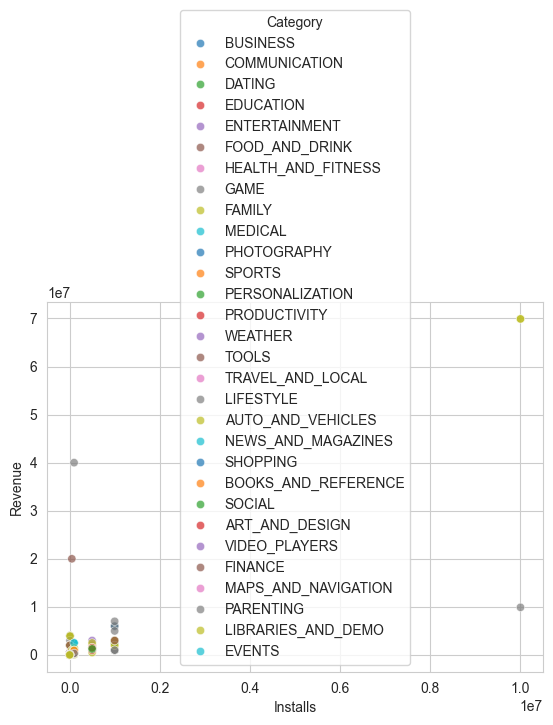

In [101]:
# Scatter plot colored by Category
scatter = sns.scatterplot(
    data=df_paid,
    x="Installs",
    y="Revenue",
    hue="Category",
    palette="tab10",
    alpha=0.7
)

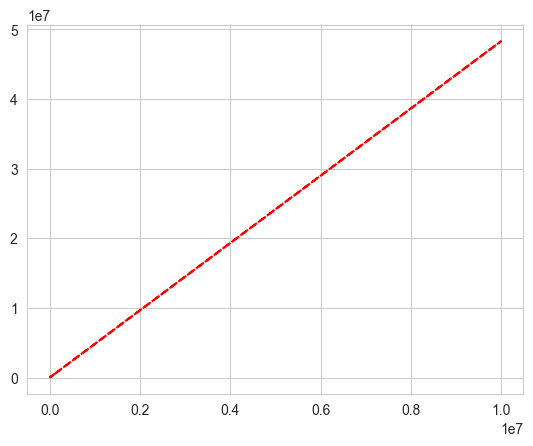

In [104]:
# Fit and plot trendline
z = np.polyfit(df_paid["Installs"], df_paid["Revenue"], 1)
p = np.poly1d(z)
plt.plot(df_paid["Installs"], p(df_paid["Installs"]), "r--", label="Trendline")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11364\1100874305.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left", bbox_to_anchor=(1, 1))


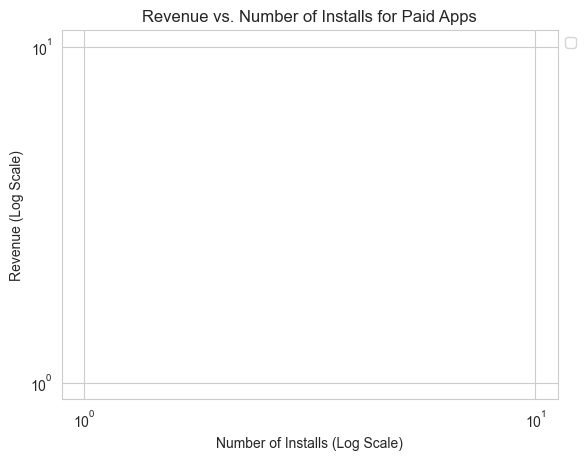

In [105]:
# Labels and title
plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")
plt.xlabel("Number of Installs (Log Scale)")
plt.ylabel("Revenue (Log Scale)")
plt.title("Revenue vs. Number of Installs for Paid Apps")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

FINAL GRAPH

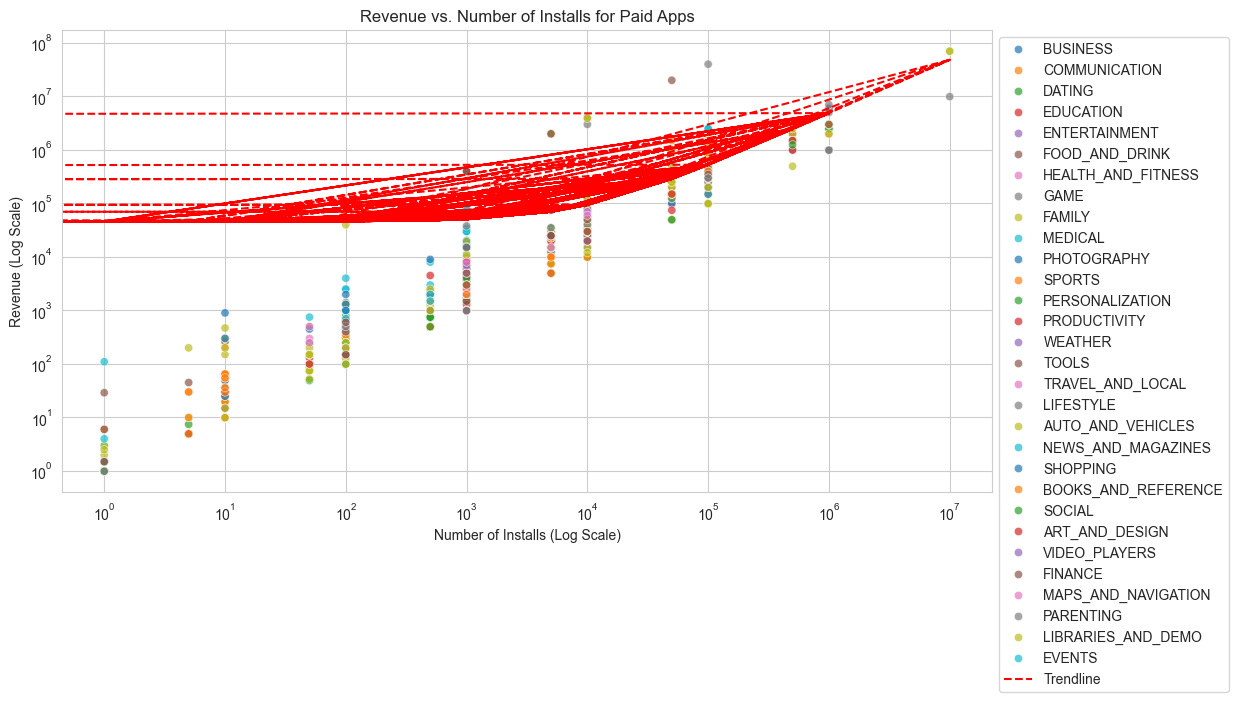

In [106]:
# Scatter Plot with Trendline
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Scatter plot colored by Category
scatter = sns.scatterplot(
    data=df_paid,
    x="Installs",
    y="Revenue",
    hue="Category",
    palette="tab10",
    alpha=0.7
)

# Fit and plot trendline
z = np.polyfit(df_paid["Installs"], df_paid["Revenue"], 1)
p = np.poly1d(z)
plt.plot(df_paid["Installs"], p(df_paid["Installs"]), "r--", label="Trendline")

# Labels and title
plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")
plt.xlabel("Number of Installs (Log Scale)")
plt.ylabel("Revenue (Log Scale)")
plt.title("Revenue vs. Number of Installs for Paid Apps")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

ANALYSIS

In [ ]:
# Analysis of the Scatter Plot:
# Positive Correlation:

# The trendline indicates a positive correlation between the number of installs and revenue.

# This makes sense, as apps with more installs generally generate higher revenue.

# Wide Revenue Range for Similar Install Counts:

# Some apps with the same number of installs have significantly different revenues.

# This suggests that pricing strategies and app categories affect revenue generation.

# Category-Based Variation:

# Different categories show varying revenue patterns.

# Some categories have apps with low installs but high revenue, likely due to higher pricing.

# Log-Log Scaling Insights:

# The log scale for both axes reveals that most paid apps have relatively few installs, while only a few have millions.

# A small percentage of apps dominate revenue generation.

# Key Takeaways:
# ✔ High installs ≠ highest revenue – pricing matters.
# ✔ Certain categories may be more profitable despite fewer installs.
# ✔ The app market is highly skewed, with a few apps making most of the revenue.